<a href="https://colab.research.google.com/github/vpbajaj/Consecutive_element_differences_in_Permutations/blob/master/Consecutive_element_differences_in_Permutations_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coins with values 1 through N (inclusive) are placed into a bag. All the coins from the bag are iteratively drawn (without replacement) at random. For the first coin, you are paid the value of the coin. For the subsequent coins, you are paid the absolute difference between the drawn coin and the previously drawn coin. For example, if you drew 5, 3, 2, 4, 1, your payments would be 5, 2, 1, 2, 3 for a total payment of 13. 
Compute the following:
1. What is the mean of your total payment for N=10?
2. What is the standard deviation of your total payment for N=10?
3. What is the mean of your total payment for N=20?
4. What is the standard deviation of your total payment for N=20?
5. What is the probability that your total payment is greater than or equal to 43 for N=10?

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.optimize import curve_fit
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Idea: Think of five coins labeled 1 through 5 in a bag. One cannot see the values, and one pick up the coins at random without replacement. There are 120 distinct ways to arrange (or permute) 5 distinct objects. For example, the draw 5, 3, 2, 4, 1 mentioned in the problem corresponds to one of the 120 possible arrangements. Note that every one of the 120 arrangements is equally likely; that is, there is no reason to favor the above arrangement (5, 3, 2, 4, 1 ) over any of the other 119 distinct arrangements. Thus, one can convert the above problem to a problem of permuting (or arranging) 5 distinct objects labelled 1 through 5, and computing the total of the absolute difference between numbers in the specific arrangement. 
Once one understands this for say 5 numbers, one may generalize it to N numbers. 
However, one must the time required to compute the desired permutations. My computer is able to generate permutations for upto N=10. So this serves well in answering the first two questions.
To answer the question for N=20, one realizes that a polynomial function fits the means and standard deviations for the data points obtained from the first ten total payments (or arrangements). Then one simply extrapolates the desired results with the correct polynomial approximation. 

In [ ]:
# Below we compute the total of the absolute difference between the drawn coin and the previouly drawn coin
# Append the total to a list called 's' 
def printArr(a, n, s):
  tot=0
  tot = a[0]+np.sum(np.abs(np.diff(a)))
  #print(tot)
  s.append(tot) 

In [ ]:
# use the heap algorithm to permute the numbers
# call the printArr method 
def heapPermutation(a, size, n, s): 
      
    # if size becomes 1 then prints the obtained 
    # permutation 
    if (size == 1): 
        printArr(a, n, s) 
        return
  
    for i in range(size): 
        heapPermutation(a,size-1,n, s); 
  
        # if size is odd, swap first and last 
        # element 
        # else If size is even, swap ith and last element 
        if size&1: 
            a[0], a[size-1] = a[size-1],a[0] 
        else: 
            a[i], a[size-1] = a[size-1],a[i]

In [ ]:
# perform the heapPermutation for the first ten numbers (which is euqivalent to the first ten total payments)
# returns required corresponding means and standard deviations for the total payments
# stores them in lists s
# mean_arr is the list of means for different values of N
# for example, mean_arr[1] is the mean for N=2 (5/2=2.5)
mean_arr=[]
std_arr=[]
tot_arr=[]
for i in range(1,11):
  a = list(range(1,i+1))
  s=[]
  n = len(a)
  heapPermutation(a, n, n, s)
  tot_arr.append(np.sum(s))
  mean_arr.append(np.mean(s))
  std_arr.append(np.std(s))


In [ ]:
# sum total of all possible payments 
print(tot_arr)
# means for the first ten total payments 
print(mean_arr)
# standard devaitions for the first ten total payments
print(std_arr)

[1, 5, 28, 180, 1320, 10920, 100800, 1028160, 11491200, 139708800]
[1.0, 2.5, 4.666666666666667, 7.5, 11.0, 15.166666666666666, 20.0, 25.5, 31.666666666666668, 38.5]
[0.0, 0.5, 0.9428090415820632, 1.5, 2.1447610589527217, 2.864534090485843, 3.6514837167011076, 4.5, 5.405758246742286, 6.365270352991039]


Solution:
1. 38.5
2. 6.37

# New Section

Let's try fitting the plot with an exponential function

In [ ]:
def f(x, a, b):
  return a*np.exp(x*b)

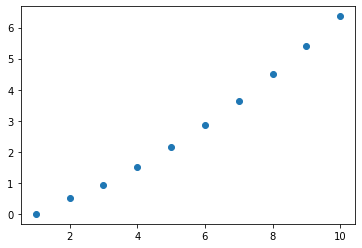

In [ ]:
time = range(1,11)
plt.scatter(time, std_arr)
plt.show()

In [ ]:
popt, pcov = curve_fit(f, time, mean_arr)
print(popt)

[2.83231717 0.26584235]


In [ ]:
xFit = np.arange(0.0, 10.0, 0.01)

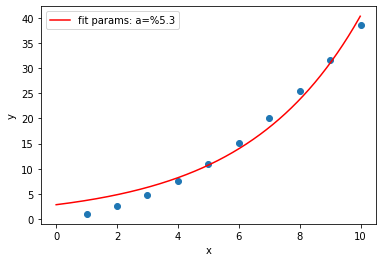

In [ ]:
plt.plot(xFit, f(xFit, *popt), 'r', label='fit params: a=%5.3')
plt.scatter(time, mean_arr)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
f(10,2.83281583, 0.26582696)

40.428735622380636

Well, this is not a good fit. Let's try a simpler model, namely, polynomials!

143.49999999999997

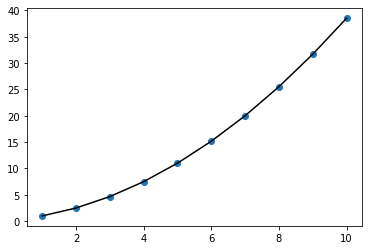

In [ ]:
curve = np.polyfit(time, mean_arr, 2)
poly = np.poly1d(curve)
y = np.polyval(poly, time)
plt.plot(time, y, 'k')
plt.scatter(time, mean_arr)
poly(20)

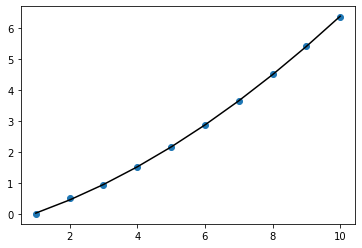

In [ ]:
curve_1 = np.polyfit(time, std_arr, 3)
poly_1 = np.poly1d(curve_1)
y_1 = np.polyval(poly_1, time)
plt.plot(time, y_1, 'k')
plt.scatter(time, std_arr)

In [ ]:

poly_1(20)

19.32508109674843

Solution:
3. 143.45
4. 19.33

# New Section

In [ ]:
def printArr_43(a, n, s_43):
  tot=0
  tot = a[0]+np.sum(np.abs(np.diff(a)))
  #print(tot)
  if tot>=43: s_43.append(tot)
  return

In [ ]:
# use the heap algorithm to permute the numbers
# call the printArr method 
def heapPermutation_43(a, size, n, s_160): 
      
    # if size becomes 1 then prints the obtained 
    # permutation 
    if (size == 1): 
        printArr_43(a, n, s_160) 
        return
  
    for i in range(size): 
        heapPermutation_43(a,size-1,n, s_43); 
  
        # if size is odd, swap first and last 
        # element 
        # else If size is even, swap ith and last element 
        if size&1: 
            a[0], a[size-1] = a[size-1],a[0] 
        else: 
            a[i], a[size-1] = a[size-1],a[i]

In [ ]:
a = list(range(1,11))
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
tot_arr_43=[]
a = list(range(1,11))
s_43=[]
n = len(a)
heapPermutation_43(a, n, n, s_43)
  #mean_arr_160.append(np.mean(s_160))
  #std_arr_160.append(np.std(s_160))
tot_arr_43.append(np.sum(s_43))

In [ ]:
print(tot_arr_43)
print(tot_arr[9])

[46602756]
139708800


In [ ]:
print('5. Probability that the total payment is greater than equal to 43 for N=10 is ' + str(tot_arr_43[0]/tot_arr[9]))

5. Probability that the total payment is greater than equal to 43 for N=10 is 0.33357065553494125
